# $m_{4\ell}$ analysis

Let's start off with a "dumb" analysis: a binned histogram analysis using $m_{4\ell}$ as the summary statistic.

In [40]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import importlib

from hstar import c6
from inference import stat

In [41]:
# read dataset
lumi = 3000.0

# cross-section x k-factor [fb]
ggzz2e2m = c6.Sample(k=1.83, xs=1.4783394, events=pd.read_csv('/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ2e2m_all/events.csv'))
ggzz4e = c6.Sample(k=1.83, xs=0.47412769, events=pd.read_csv('/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4e_all/events.csv'))
ggzz4m = c6.Sample(k=1.83, xs=0.47412769, events=pd.read_csv('/raven/u/taepa/mcfm/MCFM-10.3/Bin/ggZZ4m_all/events.csv'))
ggzz2e2m.normalize(lumi)
ggzz4e.normalize(lumi)
ggzz4m.normalize(lumi)

# concatenate all events into one sample
ggzz = c6.Sample(k=1.83, xs=1.4783394+0.47412769+0.47412769, events = pd.concat([ggzz2e2m.events, ggzz4e.events, ggzz4m.events]))
ggzz.sm_msq_key = 'msq_sbi_sm'
ggzz.c6_msq_map = {
  -5 : 'msq_sbi_c6_6',
  -1 : 'msq_sbi_c6_10',
  0 : 'msq_sbi_c6_11',
  1 : 'msq_sbi_c6_12',
  5 : 'msq_sbi_c6_16'
}
ggzz.events.head()

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,msq_gg_c6_20,msq_h_c6_21,msq_gg_c6_21,msq_h_sm,msq_gg_sm,msq_uub,msq_ddb,msq_ubu,msq_dbd,wt
0,0,0.0,0.0,-195.32320,-195.32320,0.0,0.0,54.23740,-54.23740,-4.247556,...,1.324845e-08,1.838184e-10,1.325915e-08,2.382824e-10,1.321122e-08,3.251677e-06,1.561021e-06,3.070627e-06,1.478205e-06,0.000777
1,1,0.0,0.0,-96.28981,-96.28981,0.0,0.0,92.20487,-92.20487,-28.016310,...,1.387260e-08,1.155880e-10,1.387868e-08,1.464287e-10,1.385171e-08,1.906224e-06,9.453812e-07,1.905726e-06,8.866478e-07,0.020217
2,2,0.0,0.0,-167.67200,-167.67200,0.0,0.0,76.07164,-76.07164,-14.601730,...,7.709793e-09,4.845677e-11,7.716580e-09,6.720742e-11,7.684210e-09,9.716829e-07,4.666580e-07,9.648689e-07,4.646471e-07,0.000155
3,3,0.0,0.0,-73.39238,-73.39238,0.0,0.0,386.09270,-386.09270,35.364550,...,1.027519e-10,1.893200e-12,1.029999e-10,2.016814e-12,1.018895e-10,1.072528e-08,4.168416e-09,1.446865e-08,7.989867e-09,0.000570
4,4,0.0,0.0,-296.38940,-296.38940,0.0,0.0,31.99196,-31.99196,-57.723710,...,8.915048e-09,9.709287e-11,8.921952e-09,1.242182e-10,8.891041e-09,2.166719e-06,1.058140e-06,1.611228e-06,7.782608e-07,0.067411


In [42]:
# compute m4l
ileptons = range(3,7)
p4l_px = np.sum([ggzz.events[f'p{i}_px'] for i in ileptons], axis=0)
p4l_py = np.sum([ggzz.events[f'p{i}_py'] for i in ileptons], axis=0)
p4l_pz = np.sum([ggzz.events[f'p{i}_pz'] for i in ileptons], axis=0)
p4l_E = np.sum([ggzz.events[f'p{i}_E'] for i in ileptons], axis=0)
m4l = np.sqrt(p4l_E**2 - p4l_px**2 - p4l_py**2 - p4l_pz**2)

In [43]:
m4l_bins = np.arange(180.0,1020.0,20.0)
m4l_centers = 0.5 * (m4l_bins[1:] + m4l_bins[:-1])

In [44]:
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True, height_ratios=(2,1))

# m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
# ax1.step(m4l_bins[:-1], m4l_sm, where='post', label='SM')

# c6_val = -10.0
# m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
# ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
# ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
# ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

# c6_val = +10.0
# m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(c6_val, per_event=True))
# ax1.step(m4l_bins[:-1], m4l_c6, where='post', label=f'$c_6 = {c6_val}$')
# ratio = np.divide(m4l_c6, m4l_sm, out=np.zeros_like(m4l_sm), where=m4l_sm!=0)
# ax2.plot(m4l_centers, ratio, '--', label=f'$c_6 = {c6_val}$')

# ax1.set_xlim(200,1000)
# ax1.set_ylabel('Number of Events')
# ax1.set_yscale('log')
# ax1.legend()

# ax2.set_ylim(0.8,1.2)
# ax2.set_xlabel('$m_{4\\ell}$ [GeV]')
# ax2.set_ylabel('$c_6$ / SM')

# plt.tight_layout()
# plt.show()

In [37]:
c6_vals = np.linspace(-20.0, 20.0, 201)
nll = np.zeros_like(c6_vals)

m4l_sm, _ = np.histogram(m4l, bins=m4l_bins, weights=ggzz.nu(per_event=True))
wts_c6 = ggzz.nu(c6_vals, per_event=True)
for i, c6_val in enumerate(c6_vals):
  m4l_c6, _ = np.histogram(m4l, bins=m4l_bins, weights=wts_c6[:,i])
  nll[i] = stat.nll(m4l_sm, m4l_c6)
nll = nll - np.min(nll)

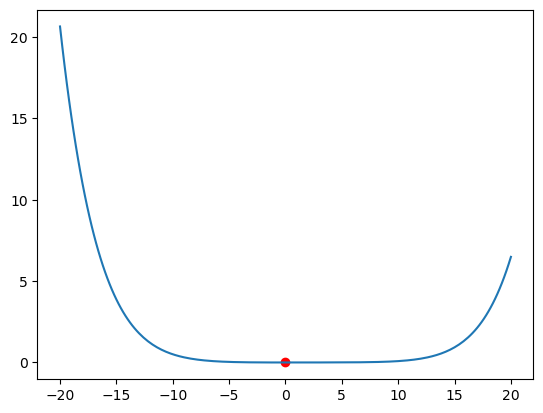

In [38]:
# find minimum
imin = np.argmin(nll)
nll_min = nll[imin]
c6_at_nll_min = c6_vals[imin]

# plot the scan + minimum
plt.plot(c6_vals, nll)
plt.scatter(c6_at_nll_min, nll_min, marker='o', color='red')
plt.show()

In [39]:
c6_vals = np.round(c6_vals, decimals = 1)
df = pd.DataFrame({'c6' : c6_vals, 'nll' : nll} )
df.to_csv('c6_nll_m4l.csv', index=False)